In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import git

In [82]:
# load benchmarks from 'measuredRuntimes' into df also add column with file name
directory_path = 'measuredRuntimes'

dfs = []
for file in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file)
    if file.endswith(".csv"):
        commit_message = None
        with open(file_path, 'r') as f:
            commit_message = f.readline().strip()

        df = pd.read_csv(file_path, skiprows=1)
        df['Commit_Message'] = commit_message
        df['SHA'] = os.path.basename(file.split('.')[0])
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [83]:
# load and merge git log data
repo_path = ''

# Initialize the Git repository
repo = git.Repo(repo_path)

# Get the Git log as a list of dictionaries
log_data = []
for commit in repo.iter_commits():
    log_data.append({
        'SHA': commit.hexsha,
        'Author': commit.author,
        'Date': commit.authored_datetime,
        'Commit_Message': commit.message.strip()
    })

# Create a DataFrame from the extracted information
commit_df = pd.DataFrame(log_data)

#convert to datetime
commit_df['Date'] = pd.to_datetime(commit_df['Date'], utc=True)

#change date column format to only show day and time
commit_df['Date'] = commit_df['Date'].dt.strftime('%d-%m-%Y %H:%M:%S')
display(commit_df)

,SHA,Author,Date,Commit_Message
0,0fc6d6a7e88536705d6bccc3b804947eb59ed036,EP2023 11802486,15-12-2023 17:16:36,Add all measured runtimes for old commits
1,f92d35e69b73cbfa78b99d44d359766e89c65a06,Jonas Bodingbauer,15-12-2023 13:38:25,Add Benchmarking Script
2,8e841af244a0b5ee2712b06c2d94f1757c7dd52d,Swarsel,13-12-2023 16:14:48,"fix last merge conflict, remaining refactoring"
3,15d4b58b724420c85fe6983316c7c9066775c6f7,Swarsel,13-12-2023 16:00:20,Merged main into iamnoteapot/labeling_bisection
4,15e202396edfa231a65475c1e368ae8e4caec508,Leon Schwarzäugl,12-12-2023 22:02:39,Merge pull request #1 from Swarsel/Refactor\n\...
5,2c18c567c79f16cbba52e15c4c98fb94774f24f5,Jonas Bodingbauer,12-12-2023 19:33:19,Corners before everything else
6,62f545fbf678118dc2842ebda110d64df7a4fe8a,Jonas Bodingbauer,12-12-2023 19:15:56,-Ofast better
7,701dcf23fc4583852fcc2df99262eccef1732abb,Jonas Bodingbauer,12-12-2023 19:03:03,Bisection
8,85c97b1b8f8831879874ab1561dd22b6bfea09df,Swarsel,12-12-2023 16:01:35,change enum to defines
9,a3209c499b6606eb53947c2c97c4d3c0fab54628,Swarsel,12-12-2023 06:44:42,add commentary; minor renaming for consistency


In [84]:
#merge commit_df with combined_df based on SHA
merged_df = pd.merge(combined_df, commit_df, on='SHA')
merged_df

,runtime,instructions,cycles,branches,branch-misses,L1-dcache-load-misses,Commit_Message_x,SHA,Author,Date,Commit_Message_y
0,63.619627,909044929836,297365680447,257262254324,2697732134,207020,#check global variable approach,4ad2f8b95fdca40e39dc4b11e878c4d4450cf78b,Swarsel,12-12-2023 00:24:36,check global variable approach
1,63.798292,909044929848,297498969097,257262254364,2699528049,238634,#check global variable approach,4ad2f8b95fdca40e39dc4b11e878c4d4450cf78b,Swarsel,12-12-2023 00:24:36,check global variable approach
2,63.722552,908811175893,297541158002,257244273237,2704524492,265896,#check global variable approach,4ad2f8b95fdca40e39dc4b11e878c4d4450cf78b,Swarsel,12-12-2023 00:24:36,check global variable approach
3,63.510108,909044929731,297418120368,257262254247,2698536162,207334,#check global variable approach,4ad2f8b95fdca40e39dc4b11e878c4d4450cf78b,Swarsel,12-12-2023 00:24:36,check global variable approach
4,63.646490,908811175825,297628212145,257244273169,2702388985,219263,#check global variable approach,4ad2f8b95fdca40e39dc4b11e878c4d4450cf78b,Swarsel,12-12-2023 00:24:36,check global variable approach
...,...,...,...,...,...,...,...,...,...,...,...
180,24.930084,290250434904,116264035087,62207792944,1207838155,79758,#compiler flag release,5dec6e1d805324fea587d7de3a9fcfc5eebc3ae1,Swarsel,12-12-2023 06:03:49,compiler flag release
181,24.596501,290484189052,115097426264,62225773988,1207444735,82986,#compiler flag release,5dec6e1d805324fea587d7de3a9fcfc5eebc3ae1,Swarsel,12-12-2023 06:03:49,compiler flag release
182,24.545293,290484189068,115151175160,62225774004,1206885758,51780,#compiler flag release,5dec6e1d805324fea587d7de3a9fcfc5eebc3ae1,Swarsel,12-12-2023 06:03:49,compiler flag release
183,24.960268,290484189134,116465186262,62225774070,1204499387,82498,#compiler flag release,5dec6e1d805324fea587d7de3a9fcfc5eebc3ae1,Swarsel,12-12-2023 06:03:49,compiler flag release


In [91]:
merged_df = merged_df.sort_values(by=['Date'], ascending=True)

In [98]:
#commit blacklist
blacklist = ['add nix flakes', 
             'Update flake.nix', 
             'Merge branch \'main\' of github.com:Swarsel/MagicHexagon',
             'add perf to devShell',
             'globalize M, o']

commits = merged_df['Commit_Message_y'].unique()

blacklisted = []
for commit in commits:
    if commit in blacklist:
        blacklisted.append(commit)
    else:
        print("\""+commit+"\"")
print(blacklisted)

# initial commit -> base implementation but missing in runtimes TODO
# add nix flakes -> BLACKLIST
# Update flake.nix -> BLACKLIST
# add README  -> Redundant with initial commit but available TODO
# Merge branch 'main' of github.com:Swarsel/MagicHexagon -> BLACKLIST only flake.nix changes
# add perf to devShell -> BLACKLIST only flake.nix and gitignore changes
# Rename variables to make code easier understandable -> introduces ENUM icrease readability not perfmance
# globalize M, o -> BLACKLIST does nott work correctly


"Rename variables to make code easier understandable"
"check global variable approach"
"fix"
"globalize f"
"unglobalize f (is slower)"
"globalize corners"
"unglobalize corners (is slower)"
"try introduce global rr"
"try const rr"
"no rr"
"try const n"
"try make multiple changes before restart"
"tune changes counter"
"tune changes limit, make defined"
"tune cc"
"test singular cc check"
"try moving f init"
"only restart at the end"
"more cc tuning"
"compiler flag release"
"add commentary; minor renaming for consistency"
"change enum to defines"
"Bisection"
"-Ofast better"
"Corners before everything else"
"Merge pull request #1 from Swarsel/Refactor

More descriptive names and commentary"
"fix last merge conflict, remaining refactoring"
"Add Benchmarking Script"
"add README"
['globalize M, o', 'add nix flakes', 'Update flake.nix', "Merge branch 'main' of github.com:Swarsel/MagicHexagon", 'add perf to devShell']


,runtime,instructions,cycles,branches,branch-misses,L1-dcache-load-misses,Commit_Message_x,SHA,Author,Date,Commit_Message_y
75,66.622969,897786697260,310935031228,257052085931,2365667840,230704,#Rename variables to make code easier understa...,5a0b5e8c63fd7b6b35f7129fa2f3c83dfb9d8d4b,Alexander Haberl,05-12-2023 13:55:42,Rename variables to make code easier understan...
77,66.225662,897786697229,309825892212,257052085900,2363733213,194301,#Rename variables to make code easier understa...,5a0b5e8c63fd7b6b35f7129fa2f3c83dfb9d8d4b,Alexander Haberl,05-12-2023 13:55:42,Rename variables to make code easier understan...
78,66.306460,897793136268,310356368049,257052581159,2368319384,254226,#Rename variables to make code easier understa...,5a0b5e8c63fd7b6b35f7129fa2f3c83dfb9d8d4b,Alexander Haberl,05-12-2023 13:55:42,Rename variables to make code easier understan...
79,66.545250,897786697295,310610875236,257052085966,2367327141,257467,#Rename variables to make code easier understa...,5a0b5e8c63fd7b6b35f7129fa2f3c83dfb9d8d4b,Alexander Haberl,05-12-2023 13:55:42,Rename variables to make code easier understan...
76,66.442827,897793136278,310144870538,257052581169,2367599745,211630,#Rename variables to make code easier understa...,5a0b5e8c63fd7b6b35f7129fa2f3c83dfb9d8d4b,Alexander Haberl,05-12-2023 13:55:42,Rename variables to make code easier understan...
...,...,...,...,...,...,...,...,...,...,...,...
55,66.566253,897827098237,310661319587,257050409726,2367218301,230531,#add README,f258e63fe1c82db97aea454c7b2f7cb6c90963c2,Swarsel,21-11-2023 14:06:02,add README
56,66.428749,897827098675,310418227882,257050410164,2367666040,231143,#add README,f258e63fe1c82db97aea454c7b2f7cb6c90963c2,Swarsel,21-11-2023 14:06:02,add README
58,66.364763,897827098120,310117469551,257050409609,2368769190,193936,#add README,f258e63fe1c82db97aea454c7b2f7cb6c90963c2,Swarsel,21-11-2023 14:06:02,add README
59,66.450979,897820659266,310198832294,257049914535,2366004566,277119,#add README,f258e63fe1c82db97aea454c7b2f7cb6c90963c2,Swarsel,21-11-2023 14:06:02,add README


/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


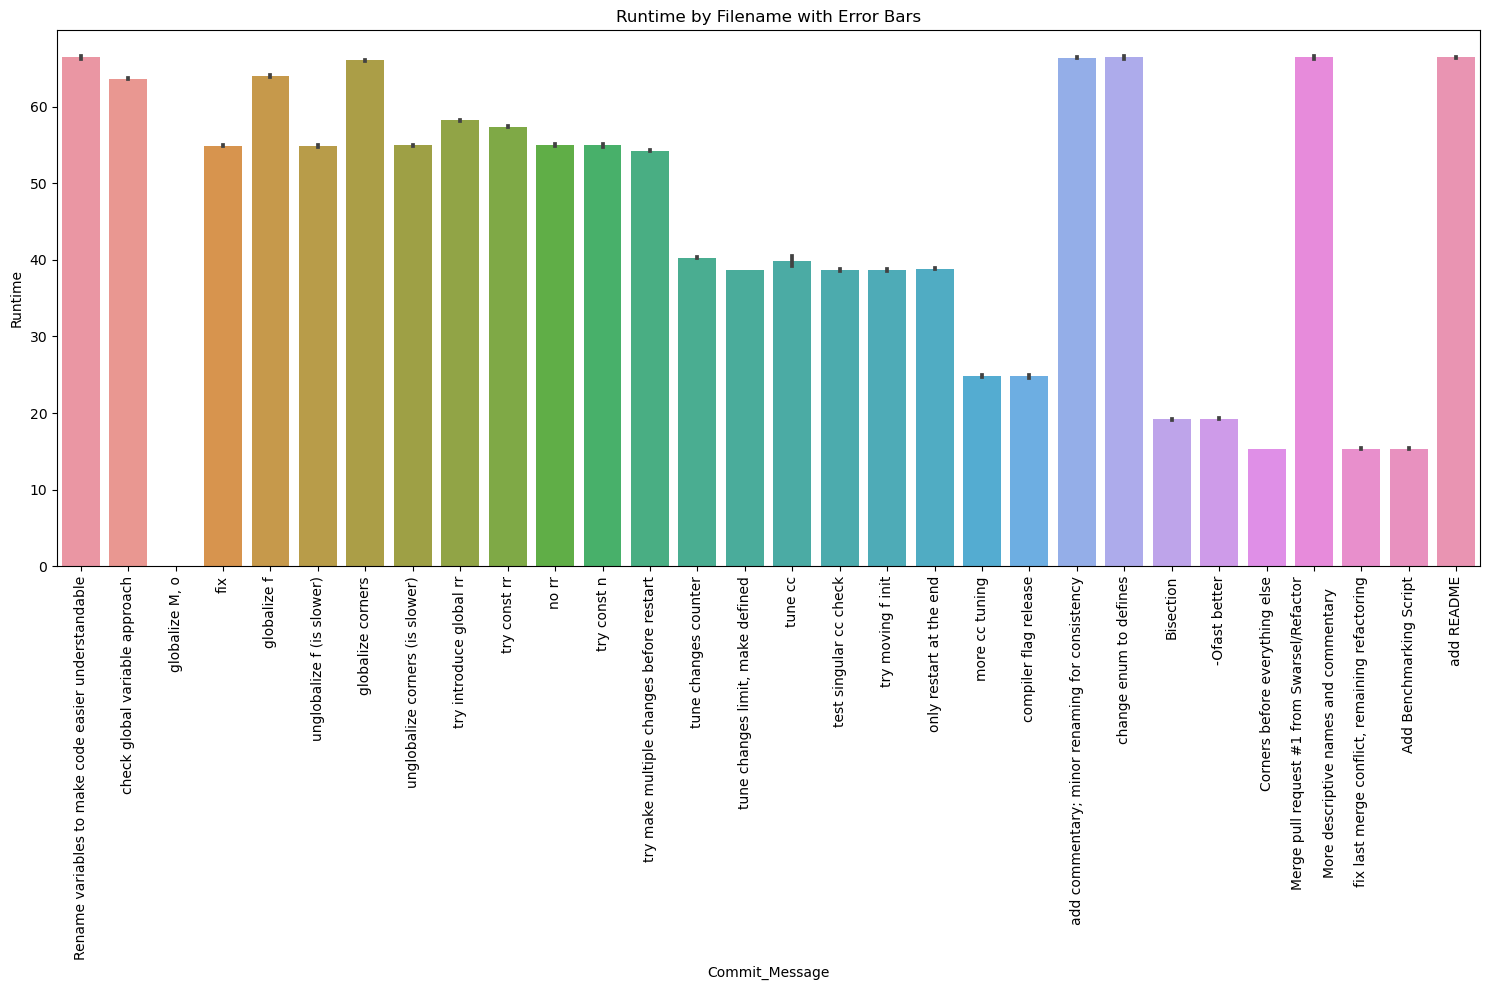

In [90]:
# plot average runtime of each commit message sort the bars by date of commit
non_blacklisted_df = merged_df[~merged_df['Commit_Message_y'].isin(blacklisted)]
non_blacklisted_df
sorted_df = non_blacklisted_df.sort_values(by=['Date'], ascending=True)
display(sorted_df)
plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_df, x='Commit_Message_y', y='runtime', errorbar='sd')
plt.xlabel('Commit_Message')
plt.ylabel('Runtime')
plt.title('Runtime by Filename with Error Bars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dalina/miniconda3/envs/simmod/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


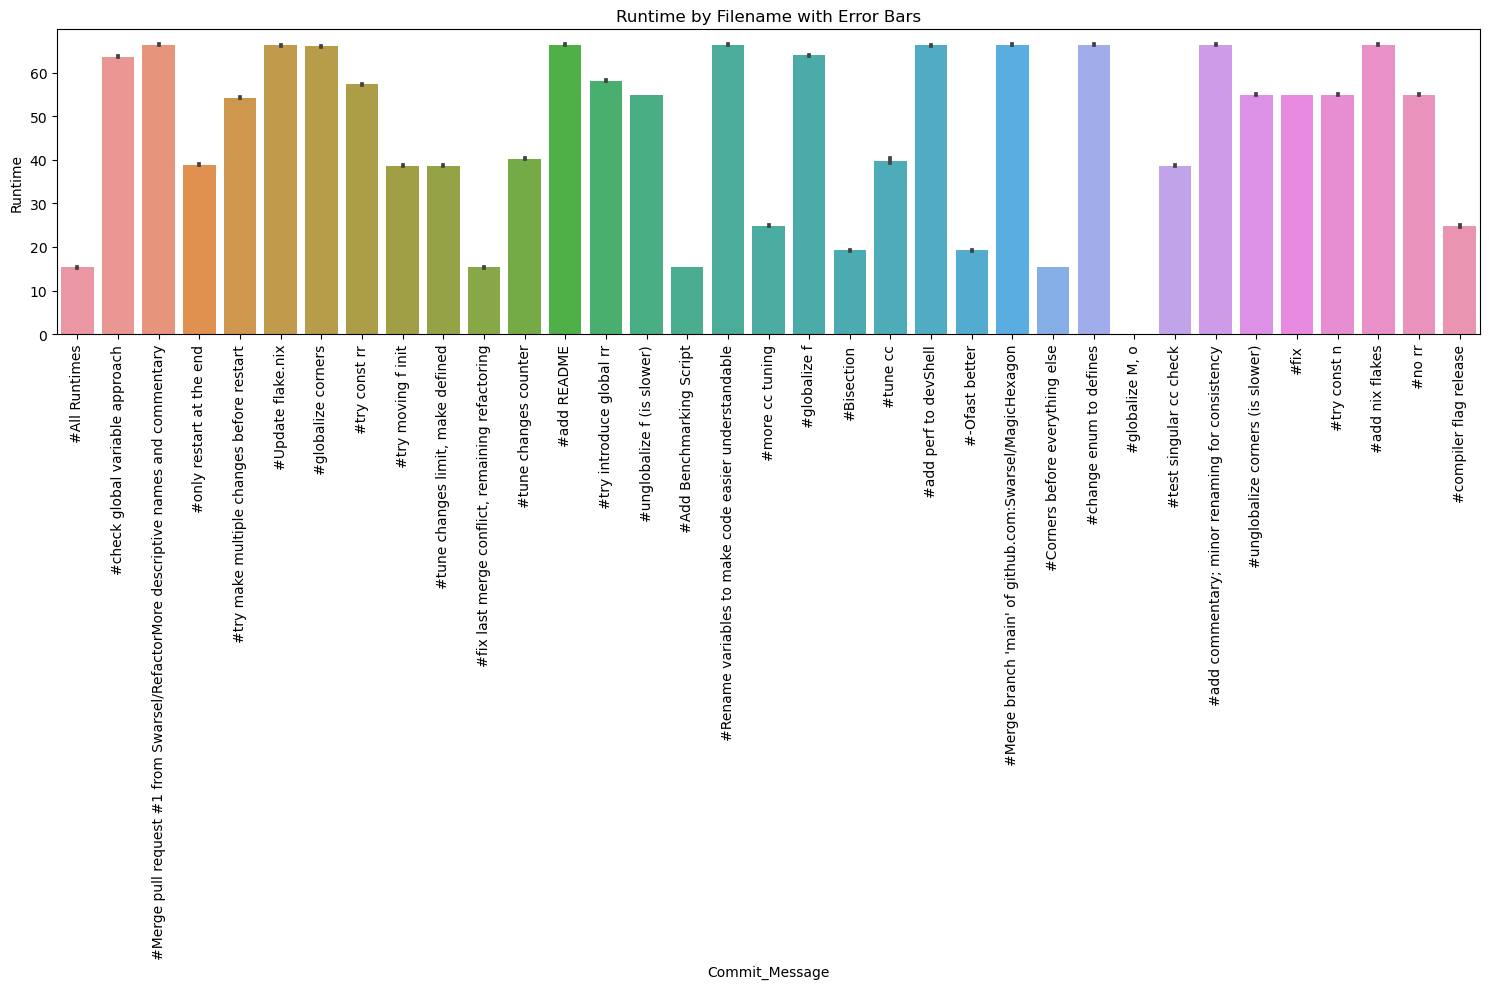

In [25]:
# create new df with mean and std of each benchmark

plt.figure(figsize=(15, 10))
sns.barplot(data=combined_df, x='Commit_Message', y='runtime', errorbar='sd')
plt.xlabel('Commit_Message')
plt.ylabel('Runtime')
plt.title('Runtime by Filename with Error Bars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()